In [1]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# normalize data
df_norm = (df - df.mean()) / df.std()

In [4]:
# PCA
pca = PCA(n_components=4)

pca.fit_transform(df_norm.values)
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.components_)

[ 2.91081808  0.92122093  0.14735328  0.02060771]
[ 0.72770452  0.23030523  0.03683832  0.00515193]
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


[ 72.77  95.8   99.48 100.  ]


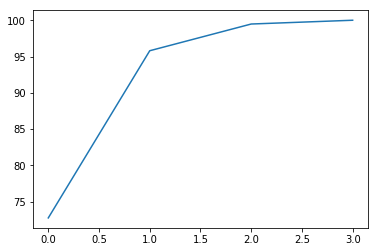

In [5]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

plt.plot(var1)
plt.show()

In [6]:
# Looking at the above plot I'm taking 2 variable. 
# From the research, I know that I will choose # of variables based on cumulative variance ratio
# that are more than 90 to 95%.

pca2 = PCA(n_components=2)

Y_sklearn = pca2.fit_transform(df_norm.values)
print (pca2.explained_variance_)
print (pca2.explained_variance_ratio_)
print (pca2.components_)

In [7]:
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

print (pd.DataFrame(pca2.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC-1           0.522372         -0.263355           0.581254          0.565611
PC-2           0.372318          0.925556           0.021095          0.065416


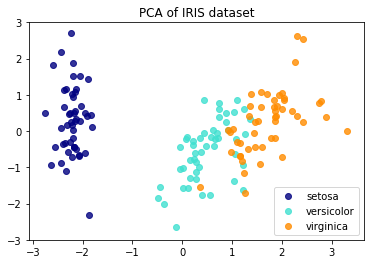

In [8]:
y = iris.target
target_names = iris.target_names


colors = ['navy', 'turquoise', 'darkorange']
lw = 1 

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Y_sklearn[y == i, 0], Y_sklearn[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
plt.show()